#### Q1. You are working on a machine learning project where you have a dataset containing numerical and categorical features. You have identified that some of the features are highly correlated and there are missing values in some of the columns. You want to build a pipeline that automates the feature engineering process and handles the missing values.

### Design a pipeline that includes the following steps:

* Use an automated feature selection method to identify the important features in the dataset.
####  Create a numerical pipeline that includes the following steps".
1. Impute the missing values #n the numerical columns using the mean of the column values.
2.  Scale the numerical columns using standardisation.
3. Create a categor#cal pipeline that includes the following steps"
4. Impute the missing values in the categorical columns using the most frequent value of the column.
5. One-hot encode the categorical columns.
6. Combine the numerical and categorical pipelines using a ColumnTransformer.
7. Use a Random Forest Classifier to build the final model.
8. Evaluate the accuracy of the model on the test dataset.

#### Note : Your Solution should include code snippets for each step of pipeline and a brief explaination of each step. You should also provide an interpretation of results and suggest possible improvements for pipeline.

### Used Employee Attrition dataset for performing above tasks
Dataset link : https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’.

### Read the dataset

In [1]:
import pandas as pd
df = pd.read_csv('Dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
df.shape

(1470, 35)

In [4]:
# Checking missing values in dataset 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


#### Observation:
    * No missing values
    * No duplicated value

In [10]:
# Seperate X and Y
X = df.drop(labels=['Attrition'],axis=1)
Y = df[['Attrition']]

In [12]:
y_mapper = {'Yes':1,'No':0}
Y = Y.replace(y_mapper)
Y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [13]:
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)

### Feature selection for numerical columns

In [16]:
from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif
X_num = X[num_cols]
k_best_numerical = SelectKBest(f_classif,k=10)
k_best_numerical.fit_transform(X_num,Y)
selected_num_features = list(X_num.columns[k_best_numerical.get_support()])
selected_num_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

### Feature Selection for categorical variables

In [18]:
from sklearn.feature_selection import SelectKBest, chi2
X_cat = X[cat_cols]
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
X_cat_encoded = pd.DataFrame(oe.fit_transform(X_cat),columns=oe.get_feature_names_out())
k_best_categorical = SelectKBest(chi2,k=5)
k_best_categorical.fit_transform(X_cat_encoded,Y)
selected_cat_features = list(X_cat_encoded.columns[k_best_categorical.get_support()])
selected_cat_features

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [19]:
selected_features = selected_num_features + selected_cat_features
selected_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [20]:
X_selected = X[selected_features]
X_selected.head()

,Age,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department,EducationField,JobRole,MaritalStatus,OverTime
0,41,3,2,4,5993,0,8,6,4,5,Sales,Life Sciences,Sales Executive,Single,Yes
1,49,2,2,2,5130,1,10,10,7,7,Research & Development,Life Sciences,Research Scientist,Married,No
2,37,2,1,3,2090,0,7,0,0,0,Research & Development,Other,Laboratory Technician,Single,Yes
3,33,3,1,3,2909,0,8,8,7,0,Research & Development,Life Sciences,Research Scientist,Married,Yes
4,27,3,1,2,3468,1,6,2,2,2,Research & Development,Medical,Laboratory Technician,Married,No


### Train Test Split of data

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_selected,Y,test_size=0.2,random_state=42,stratify=Y)

In [22]:
xtrain.shape

(1176, 15)

In [23]:
xtest.shape

(294, 15)

### Creating numeric and categorical pipeline

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
# Numeric Pipeline creation
num_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                               ('scaler',StandardScaler())])
# Categorical Pipeline creation
cat_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                               ('one_hot_encoder',OneHotEncoder()),
                               ('scaler',StandardScaler(with_mean=False))])

### ColumnTransformer to combine numeric and Categorical pipelines

In [25]:
selected_num_features

['Age',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [26]:
selected_cat_features

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [27]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([('num_pipeline',num_pipeline,selected_num_features),
                                  ('cat_pipeline',cat_pipeline,selected_cat_features)])

### Transform the dataset with ColumnTransformer

In [29]:
xtrain_transformed = pd.DataFrame(preprocessor.fit_transform(xtrain),columns=preprocessor.get_feature_names_out())
xtest_transformed = pd.DataFrame(preprocessor.transform(xtest),columns=preprocessor.get_feature_names_out())

In [30]:
preprocessor.get_feature_names_out()

array(['num_pipeline__Age', 'num_pipeline__JobInvolvement',
       'num_pipeline__JobLevel', 'num_pipeline__JobSatisfaction',
       'num_pipeline__MonthlyIncome', 'num_pipeline__StockOptionLevel',
       'num_pipeline__TotalWorkingYears', 'num_pipeline__YearsAtCompany',
       'num_pipeline__YearsInCurrentRole',
       'num_pipeline__YearsWithCurrManager',
       'cat_pipeline__Department_Human Resources',
       'cat_pipeline__Department_Research & Development',
       'cat_pipeline__Department_Sales',
       'cat_pipeline__EducationField_Human Resources',
       'cat_pipeline__EducationField_Life Sciences',
       'cat_pipeline__EducationField_Marketing',
       'cat_pipeline__EducationField_Medical',
       'cat_pipeline__EducationField_Other',
       'cat_pipeline__EducationField_Technical Degree',
       'cat_pipeline__JobRole_Healthcare Representative',
       'cat_pipeline__JobRole_Human Resources',
       'cat_pipeline__JobRole_Laboratory Technician',
       'cat_pipeline__Job

In [31]:
xtrain_transformed.head()

,num_pipeline__Age,num_pipeline__JobInvolvement,num_pipeline__JobLevel,num_pipeline__JobSatisfaction,num_pipeline__MonthlyIncome,num_pipeline__StockOptionLevel,num_pipeline__TotalWorkingYears,num_pipeline__YearsAtCompany,num_pipeline__YearsInCurrentRole,num_pipeline__YearsWithCurrManager,...,cat_pipeline__JobRole_Manufacturing Director,cat_pipeline__JobRole_Research Director,cat_pipeline__JobRole_Research Scientist,cat_pipeline__JobRole_Sales Executive,cat_pipeline__JobRole_Sales Representative,cat_pipeline__MaritalStatus_Divorced,cat_pipeline__MaritalStatus_Married,cat_pipeline__MaritalStatus_Single,cat_pipeline__OverTime_No,cat_pipeline__OverTime_Yes
0,1.090194,1.795282,1.762189,-0.647997,2.026752,2.613100,2.261482,-0.665706,-0.625365,-0.616406,...,0.0,0.0,0.0,0.0,0.000000,2.399905,0.000000,0.0,2.205793,0.000000
1,-1.634828,0.373564,-0.986265,1.153526,-0.864408,0.247430,-1.072675,-0.830071,-0.905635,-0.897047,...,0.0,0.0,0.0,0.0,0.000000,0.000000,2.006697,0.0,2.205793,0.000000
2,0.981193,0.373564,1.762189,0.252765,2.347706,0.247430,1.492061,0.813578,1.336527,1.348076,...,0.0,0.0,0.0,0.0,0.000000,0.000000,2.006697,0.0,2.205793,0.000000
3,-1.307825,0.373564,-0.986265,0.252765,-0.956202,-0.935405,-0.559727,-0.008246,-0.064824,0.506155,...,0.0,0.0,0.0,0.0,4.544641,0.000000,2.006697,0.0,2.205793,0.000000
4,0.654191,0.373564,-0.070114,0.252765,-0.185956,0.247430,-0.175017,0.156119,0.775986,0.786795,...,0.0,0.0,0.0,0.0,0.000000,2.399905,0.000000,0.0,0.000000,2.205793


### Training Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=21)
rfc.fit(xtrain_transformed,ytrain)

RandomForestClassifier(max_depth=8, random_state=21)

In [33]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_val_score(rfc,xtrain_transformed,ytrain,cv=skf,scoring='accuracy')
scores

array([0.86016949, 0.88085106, 0.86382979, 0.85106383, 0.85531915])

In [35]:
import numpy as np
np.mean(scores)

0.8622466642625316

### Hyperparameter Tuning

In [36]:
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [37]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=parameters,
                          cv=skf,
                          n_iter=50,
                          scoring='accuracy',
                          verbose=3)

In [38]:
rscv.fit(xtrain_transformed,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=8, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.864 total time=   0.0s
[CV 2/5] END max_depth=8, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.860 total time=   0.0s
[CV 3/5] END max_depth=8, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.864 total time=   0.0s
[CV 4/5] END max_depth=8, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.834 total time=   0.0s
[CV 5/5] END max_depth=8, min_samples_leaf=6, min_samples_split=10, n_estimators=10;, score=0.843 total time=   0.0s
[CV 1/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.869 total time=   0.9s
[CV 2/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.872 total time=   0.9s
[CV 3/5] END max_depth=9, min_samples_leaf=3, min_samples_split=10, n_estimators=400;, score=0.855 total time=   0.9s

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='accuracy', verbose=3)

In [39]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 8}

In [41]:
rscv.best_score_

0.863941579516769

In [42]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300)

### Evaluate model on test data

In [43]:
ypred_test = best_rfc.predict(xtest_transformed)
ypred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

<AxesSubplot: >

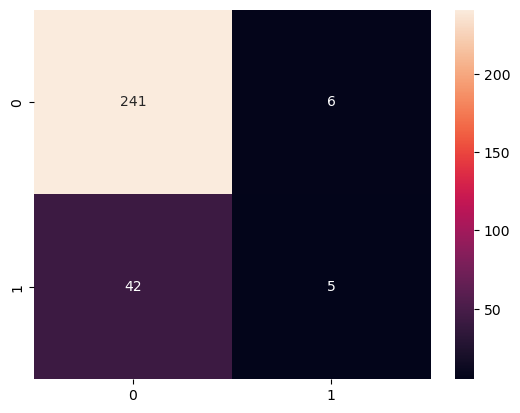

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest, ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [45]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest, ypred_test)
print(f'Accuracy on testing data is {acc:.4f}')

Accuracy on testing data is 0.8367


### Insights
* Above model has accuracy of 0.8367 on testing data
* However above data has imbalance data on target
* To deal with imbalanced techniques such as SMOTE (Synthetic Minority Oversampling TEchnique)
* Feature selection can also be avoided in above data and performance should be checked with all features as well.

## Question 2 : Build a pipeline that includes random forest classifier and a logistic regression classifier , and then voting classifier to combine their predictions. Train the pipeline on iris dataset and evaluate its accuracy.

### Load iris dataset

In [63]:
from sklearn.datasets import load_iris
X,Y = load_iris(return_X_y=True)

In [64]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [65]:
xtrain.shape, xtest.shape

((105, 4), (45, 4))

### Standard Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

### Create pipeline

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
# Defining Base models
rfc = RandomForestClassifier(n_estimators=100,max_depth=4)
lr = LogisticRegression(C=1.0)
# Voting Classifier Pipeline
vc = VotingClassifier(estimators=[('rfc',rfc),
                                  ('lr',lr)],
                                  voting='soft')

In [68]:
vc.fit(xtrain,ytrain)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(max_depth=4)),
                             ('lr', LogisticRegression())],
                 voting='soft')

## Predicting the test results

In [69]:
ypred_test = vc.predict(xtest)
ypred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

### Evaluating the model on test data

<AxesSubplot: >

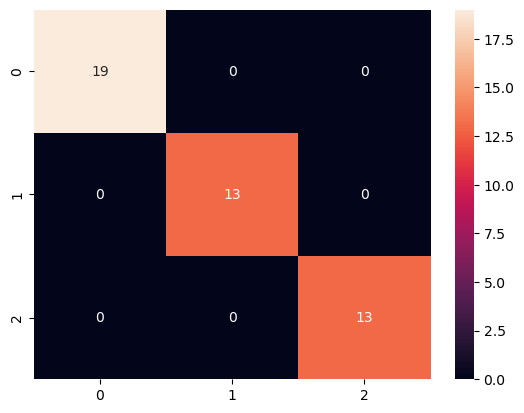

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [71]:
# Classification Report 
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [72]:
# Accuracy Score
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,ypred_test)
print(f'Accuracy on Final Voting Classifier model is {acc*100:.2f}%')

Accuracy on Final Voting Classifier model is 100.00%
